In [2]:
import pandas as pd
import os
import pandas_datareader as pdr

In [3]:
stock=pdr.get_data_tiingo('TSLA', api_key='05447f92ce7e59264897f8ab3448dd6a810709c9')
stock.to_csv('TESLA.csv')

<ipython-input-3-a27ea3f06728>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  stock=pdr.get_data_tiingo('TSLA', api_key='05447f92ce7e59264897f8ab3448dd6a810709c9')


In [4]:
stock=pd.read_csv('TESLA.csv')

In [5]:
stock.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-07-13 00:00:00+00:00,318.87,319.58,309.25,315.58,5875770,21.258000,21.305333,20.616667,21.038667,88136550,0.0,1.0
1,TSLA,2018-07-16 00:00:00+00:00,310.10,315.16,306.25,311.71,7818655,20.673333,21.010667,20.416667,20.780667,117279825,0.0,1.0
2,TSLA,2018-07-17 00:00:00+00:00,322.69,324.74,308.50,308.81,6996232,21.512667,21.649333,20.566667,20.587333,104943480,0.0,1.0
3,TSLA,2018-07-18 00:00:00+00:00,323.85,325.50,316.25,325.00,5624211,21.590000,21.700000,21.083333,21.666667,84363165,0.0,1.0
4,TSLA,2018-07-19 00:00:00+00:00,320.23,323.54,314.01,316.33,5915345,21.348667,21.569333,20.934000,21.088667,88730175,0.0,1.0


In [6]:
stock.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2023-07-05 00:00:00+00:00,282.48,283.85,277.60,278.82,131530862,282.48,283.85,277.60,278.82,131530862,0.0,1.0
1252,TSLA,2023-07-06 00:00:00+00:00,276.54,279.97,272.88,278.09,120707419,276.54,279.97,272.88,278.09,120707419,0.0,1.0
1253,TSLA,2023-07-07 00:00:00+00:00,274.43,280.78,273.77,278.43,113879174,274.43,280.78,273.77,278.43,113879174,0.0,1.0
1254,TSLA,2023-07-10 00:00:00+00:00,269.61,277.52,265.10,276.47,119425405,269.61,277.52,265.10,276.47,119425405,0.0,1.0
1255,TSLA,2023-07-11 00:00:00+00:00,269.79,270.90,266.37,268.65,91972358,269.79,270.90,266.37,268.65,91972358,0.0,1.0


In [7]:
x=stock[["close"]]
year=stock[["date"]]
x

,close
0,318.87
1,310.10
2,322.69
3,323.85
4,320.23
...,...
1251,282.48
1252,276.54
1253,274.43
1254,269.61


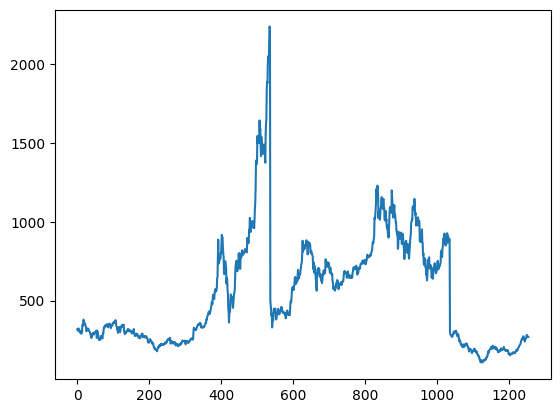

In [8]:
#plotting
import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

In [9]:
x.max()

close    2238.75
dtype: float64

In [10]:
x.describe()

,close
count,1256.000000
mean,546.308515
std,345.783987
min,108.100000
25%,260.127500
50%,429.480000
75%,764.622500
max,2238.750000


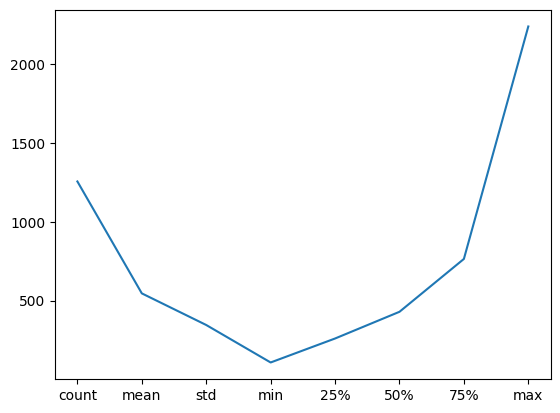

In [11]:
plt.plot(x.describe())

In [12]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

mms=MinMaxScaler(feature_range=(0, 1))
scaled_x=mms.fit_transform(x.values.reshape(-1,1))
scaled_x.shape

(1256, 1)

In [13]:
# SPlitting of data
train_data=scaled_x[:int(len(scaled_x)*0.75), :]
test_data=scaled_x[int(len(scaled_x)*0.75):len(scaled_x), :]

In [14]:
train_data.shape, test_data.shape

((942, 1), (314, 1))

In [15]:
# hyperparameter tuning

def split_data(data, time_step=1):
    n=len(data)
    x_set,y_set=[],[]
    for i in range(n-time_step-1):
        a=data[i:(i+time_step),0]
        x_set.append(a)
        y_set.append(data[i+time_step,0])
    return x_set,y_set

time_step=50
x_train,y_train=split_data(train_data,time_step)
x_test,y_test=split_data(test_data,time_step)

In [16]:
#now x_train and others are in list format..we change it to array
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [17]:
x_train.shape,y_train.shape

((891, 50), (891,))

In [18]:


x_test.shape,y_test.shape

((263, 50), (263,))

In [19]:
# now we create a stacked lstm model
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
x_train.shape   # 3d array

(891, 50, 1)

In [21]:
#create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

seq=Sequential()
seq.add(LSTM(50, return_sequences=True, input_shape=(50,1))) ## here 100 is the x_train.shape[1] and 1 is the 1 we put for 3d
seq.add(LSTM(50, return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1))
seq.compile(loss='mse', optimizer='adam')

In [22]:

seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
#from keras.callbacks import EarlyStopping
#es=EarlyStopping(monitor='val_loss',mode='min', verbose=1)  #early stopping to overcome overfit
h=seq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)   #here the 3d array is used to fit our model

Epoch 1/100
14/14 [==============================] - 10s 206ms/step - loss: 0.0306 - val_loss: 0.0061
Epoch 2/100
14/14 [==============================] - 2s 112ms/step - loss: 0.0100 - val_loss: 0.0063
Epoch 3/100
14/14 [==============================] - 1s 106ms/step - loss: 0.0068 - val_loss: 0.0028
Epoch 4/100
14/14 [==============================] - 2s 109ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 5/100
14/14 [==============================] - 1s 108ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 6/100
14/14 [==============================] - 2s 155ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 7/100
14/14 [==============================] - 2s 151ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 8/100
14/14 [==============================] - 2s 112ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 9/100
14/14 [==============================] - 1s 106ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 10/100
14/14 [==============================] - 1s 107ms/step - loss: 0.0039 - val_l

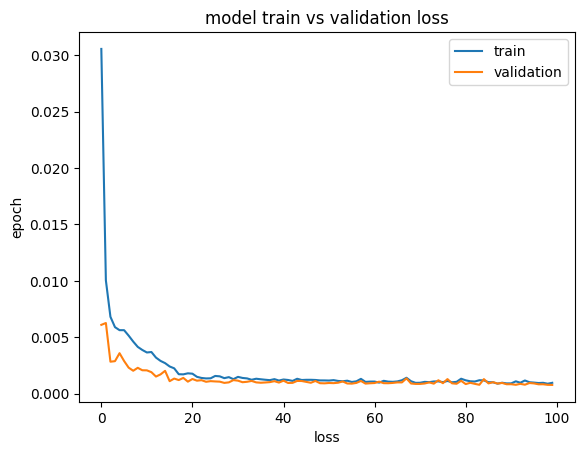

In [24]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
y_train_pred=seq.predict(x_train)
y_test_pred=seq.predict(x_test)
y_train_pred.shape   #scaled as per min max scaler

9/9 [==============================] - 0s 32ms/step


(891, 1)

In [26]:
# Transformback to original form to conduct rmse
y_train_pred=mms.inverse_transform(y_train_pred)
y_test_pred=mms.inverse_transform(y_test_pred)
y_test_pred.shape

(263, 1)

In [27]:
y_train_pred.shape

(891, 1)

In [28]:
y_train=mms.inverse_transform(y_train.reshape(-1,1))      # because to tranform it array needs to be 2d and our y is 1d(look above)
y_test=mms.inverse_transform(y_test.reshape(-1,1))
#y_train

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
math.sqrt(mean_squared_error(y_train,y_train_pred))      #make sure both train and predicted are scaled back(inverse transform) before performing rmse

62.40928770822757

In [30]:
mean_absolute_error(y_train,y_train_pred)

33.06705747593666

In [31]:
math.sqrt(mean_squared_error(y_test,y_test_pred))

59.427365104449635

In [32]:
mean_absolute_error(y_test,y_test_pred)

25.442506358795743

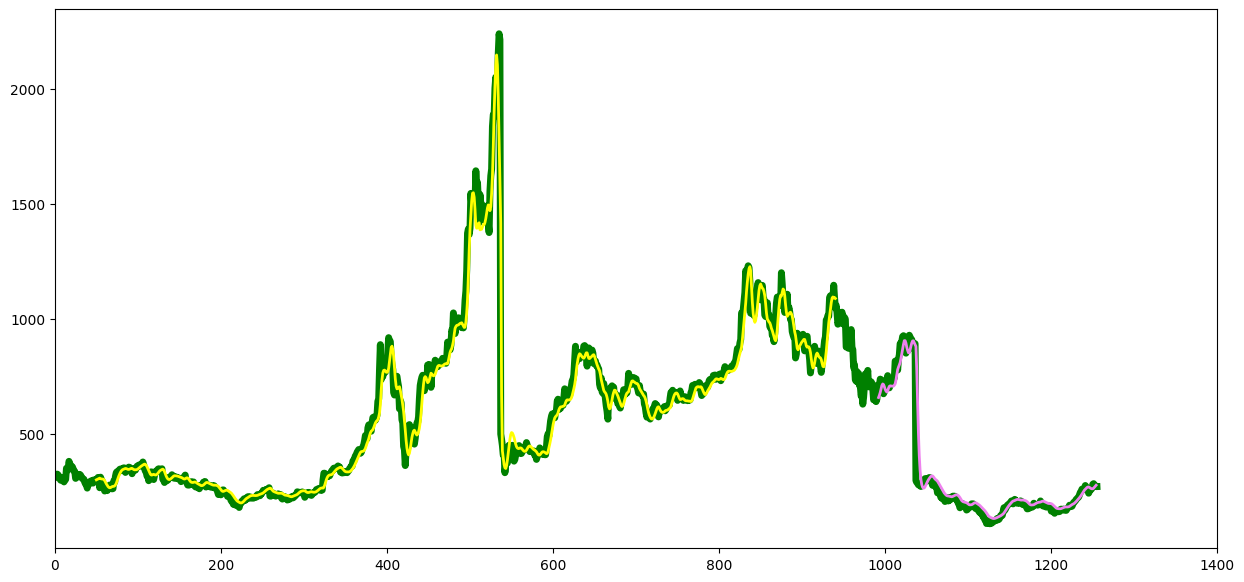

In [33]:
### Plotting
# shift train and test predictions for plotting
## Here none of the values I'm using is scaled they are normal with no min max scaling done
import numpy as np

start_index=50
predicted_train = np.empty_like(x)
predicted_train[:, :] = np.nan
predicted_train[start_index:len(y_train_pred)+start_index, :] = y_train_pred

# shift test predictions for plotting
predicted_test = np.empty_like(x)
predicted_test[:, :] = np.nan
predicted_test[len(y_train_pred)+ 1+ (start_index*2):len(x)-1, :] = y_test_pred

# plot baseline and predictions
plt.figure(figsize=(15,7))
plt.plot(x, linewidth=5,color='green')
plt.plot(predicted_train, color='yellow', linewidth=2)
plt.plot(predicted_test,color='violet', linewidth=2)
plt.xlim(0,1400)

plt.show()

In [34]:
test_data.shape

(314, 1)

In [35]:
x_future=test_data[265:].reshape(1,-1)
x_future.shape   #it is scaled as our test_data was scaled (2d array with shape (1,100))

(1, 49)

In [36]:
temp=list(x_future)
temp=temp[0].tolist()
len(temp)  #converted to list

49

In [39]:
import numpy as np

y_futurelist=[]
steps=50
i=0
while(i<30):
   if(len(temp)>50):
     x_future=np.array(temp[1:])
     x_future=x_future.reshape(1,-1) #convert list to 2d
     x_future=x_future.reshape(1, steps, 1)  # and then to 3d
     y_future=seq.predict(x_future, verbose=0)
     print(f"preicted value of day {i+1}={y_future[0]}")
     temp.extend(y_future[0].tolist())
     print(temp)
     temp=temp[1:]
     y_futurelist.extend(y_future.tolist())
     i+=1

   else:
     x_future = x_future.reshape((1, steps-1,1))
     y_future = seq.predict(x_future, verbose=0)
     print(f"preicted value of day {1}={y_future[0]}")
     temp.extend(y_future[0].tolist())
     print(len(temp))
     y_futurelist.extend(y_future.tolist())
     i+=1
print(y_futurelist)   # the values are scaled

preicted value of day 1=[0.07986195]
50
preicted value of day 1=[0.07986195]
51
preicted value of day 3=[0.08034427]
[0.025217656583671658, 0.024504259263605013, 0.02464506136624975, 0.024921972168117715, 0.029080327599558822, 0.02989228639147677, 0.02865322788820314, 0.028366930279492178, 0.03002839509070003, 0.02810409968788867, 0.027339074930185628, 0.027418862788350984, 0.030863820899725447, 0.03228592213643723, 0.03381127824842184, 0.03790861943538357, 0.036453664374721334, 0.03510665759275339, 0.035843521929927485, 0.03992678290662474, 0.04367681224039613, 0.044976884988149154, 0.04666181681646446, 0.04968906202332622, 0.05139746086874898, 0.053134020134700685, 0.05466406965010677, 0.05949358177082112, 0.06397108863492362, 0.06651960669279329, 0.07068734893107737, 0.06978621547415109, 0.06936850256963838, 0.07154624175721025, 0.07807476591650434, 0.0710393541876892, 0.07345645694975712, 0.06969704080914275, 0.06239879848872411, 0.06669795602280995, 0.06952807828596907, 0.07011944

In [40]:
x_flat=np.array(x).flatten()
x_flat.shape

(1256,)

Text(0, 0.5, 'Close value')

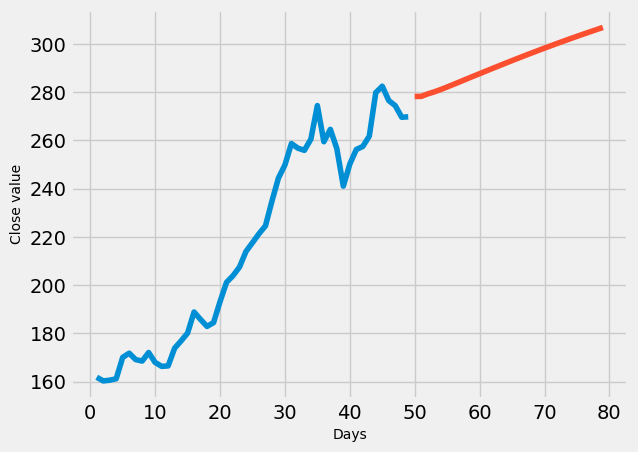

In [44]:
#now we take the readings of last 100 days plus 30 now forecasted days
day=np.arange(1,50)
day_pred=np.arange(50,80)
plt.style.use("fivethirtyeight")
plt.plot(day,x_flat[1207:])  # in blue
plt.plot(day_pred,mms.inverse_transform(y_futurelist)) # in red
plt.xlabel("Days", fontsize=10)
plt.ylabel("Close value", fontsize=10)

(1286,)


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Close value')

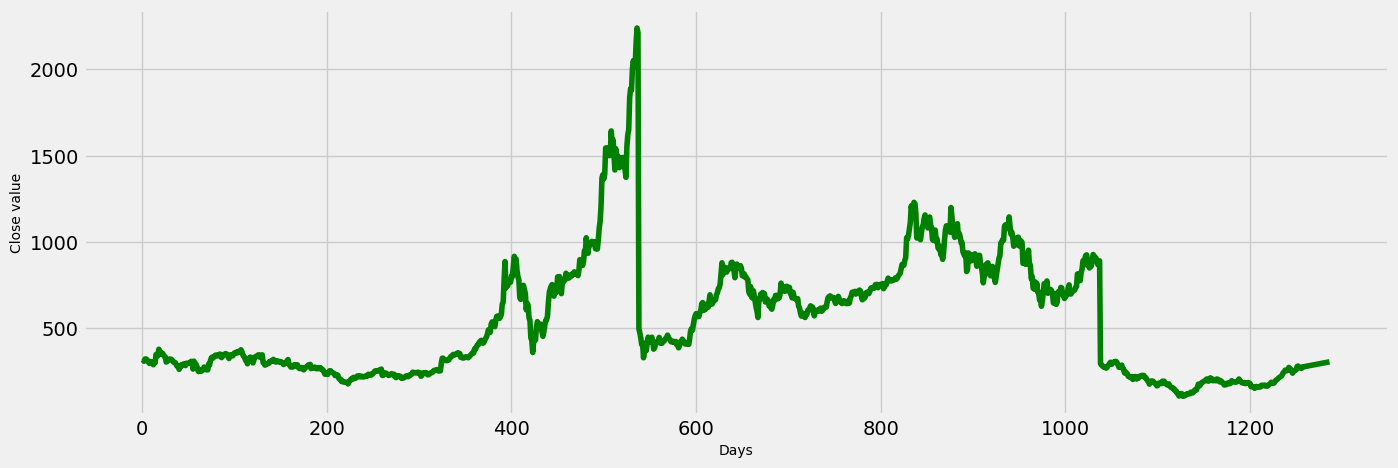

In [47]:
#forecasting of 30 days plus from start
x_new=x_flat.tolist()
x_new.extend(mms.inverse_transform(y_futurelist))  #first convert x to list and then extend with y_futurelist which is a list

# as we can plot single features only
## inverse because the futurelist is scaled and x is not
d=np.arange(1,1287)
print(d.shape)
plt.figure(figsize=(15,5))
plt.style.use("fivethirtyeight")
plt.plot(d,x_new, color='green')
plt.xlabel("Days", fontsize=10)
plt.ylabel("Close value", fontsize=10)

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Close value')

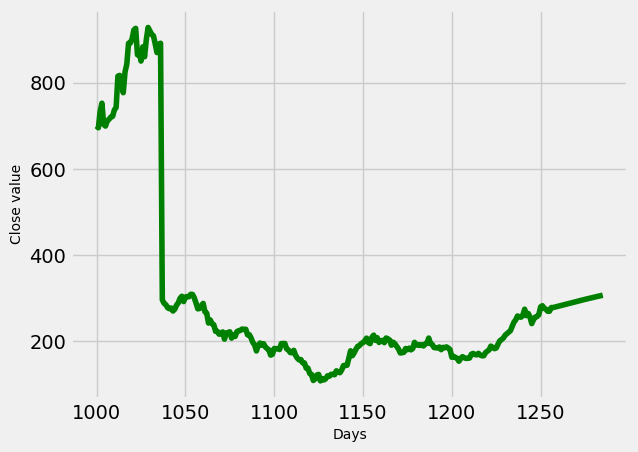

In [55]:
# Days start from 1000th day, we have our values upto 1259 day rest 30 days are forecasted

d1=np.arange(1000,1286).tolist()
plt.style.use("fivethirtyeight")
plt.plot(d1,x_new[1000:],color='green')
plt.xlabel("Days", fontsize=10)
plt.ylabel("Close value", fontsize=10)

In [56]:
max(x_new)

2238.75

In [57]:
d.shape

(1286,)

In [58]:
x_new

[318.87,
 310.1,
 322.69,
 323.85,
 320.23,
 313.58,
 303.2,
 297.43,
 308.74,
 306.65,
 297.18,
 290.17,
 298.14,
 300.84,
 349.54,
 348.17,
 341.99,
 379.57,
 370.34,
 352.45,
 355.49,
 356.41,
 347.64,
 338.69,
 335.45,
 305.5,
 308.44,
 321.9,
 321.64,
 320.1,
 322.82,
 319.27,
 311.86,
 305.01,
 303.15,
 301.66,
 288.95,
 280.74,
 280.95,
 263.24,
 285.5,
 279.44,
 290.54,
 289.46,
 295.2,
 294.84,
 284.96,
 299.02,
 298.33,
 299.1,
 299.68,
 300.99,
 309.58,
 307.52,
 264.77,
 310.7,
 301.02,
 294.8,
 281.83,
 261.95,
 250.56,
 262.8,
 256.88,
 252.23,
 258.78,
 259.59,
 276.59,
 271.78,
 263.91,
 260.0,
 260.95,
 294.14,
 288.5,
 314.86,
 330.9,
 334.85,
 329.9,
 337.32,
 344.28,
 346.41,
 341.4,
 341.06,
 348.16,
 351.4,
 350.51,
 331.28,
 338.73,
 344.0,
 348.44,
 354.31,
 353.47,
 347.49,
 338.19,
 325.83,
 346.0,
 343.92,
 347.87,
 341.17,
 350.48,
 358.49,
 359.7,
 363.06,
 357.97,
 365.15,
 366.76,
 366.6,
 376.79,
 365.71,
 348.42,
 337.03,
 332.97,
 315.38,
 319.77,
 295